In [2]:
cd /content/drive/MyDrive/MachineLearning

/content/drive/MyDrive/MachineLearning


In [3]:
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


data= "./"
test_link = data + "test.p"
with open(test_link, mode="rb") as f :
  test = pickle.load(f)

classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

testX = test["features"]
testY = test["labels"]
testX = testX.astype("float") / 255.0




In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1fec95f30e5950f5bd38a2fbfaeaad4f2e86dfbdf7e4b5345e0a71b0150205c4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [4]:
train_link = data + "train.p"

In [5]:
valid_link = data + "valid.p"

In [8]:
with open(train_link, mode="rb") as f :
  train = pickle.load(f)

In [9]:
with open(valid_link, mode="rb") as f :
  valid = pickle.load(f)

In [12]:
trainX = train["features"]

In [14]:
trainY=train["labels"]

In [16]:
trainX , trainY = shuffle(trainX , trainY)

In [17]:
validX = valid["features"]
validY = valid["labels"]


In [11]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0


NameError: name 'trainX' is not defined

In [20]:
from sklearn.preprocessing import LabelBinarizer

In [21]:
lb = LabelBinarizer()

In [22]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [23]:
trainY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3,3) , padding = "same" , input_shape = shape ))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3) , padding = "same" ))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Conv2D(64, (3,3) , padding = "same" ))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3,3) , padding = "same" ))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [25]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
aug = ImageDataGenerator(rotation_range= 0.18 , zoom_range = 0.15 , width_shift_range= 0.2 , height_shift_range= 0.2 , horizontal_flip= True )

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
opt = SGD(learning_rate= learning_rate , momentum = 0.9)

In [ ]:
model.compile(optimizer= opt , loss="categorical_crossentropy" , metrics = ["accuracy"])

In [ ]:
print("Start Training")
H = model.fit_generator(aug.flow(trainX, trainY , batch_size = batch_size) , validation_data = (validX, validY) , steps_per_epoch= trainX.shape[0]//batch_size, epochs=epochs, verbose = 1)

Start Training
Epoch 1/10


<ipython-input-67-8e4cd8150892>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY , batch_size = batch_size) , validation_data = (validX, validY) , steps_per_epoch= trainX.shape[0]//batch_size, epochs=epochs, verbose = 1)


543/543 [==============================] - 218s 398ms/step - loss: 2.0488 - accuracy: 0.4022 - val_loss: 1.7694 - val_accuracy: 0.4526
Epoch 2/10
543/543 [==============================] - 215s 396ms/step - loss: 0.8756 - accuracy: 0.7064 - val_loss: 1.3233 - val_accuracy: 0.6147
Epoch 3/10
543/543 [==============================] - 218s 402ms/step - loss: 0.4427 - accuracy: 0.8534 - val_loss: 1.0653 - val_accuracy: 0.7068
Epoch 4/10
543/543 [==============================] - 213s 393ms/step - loss: 0.2710 - accuracy: 0.9102 - val_loss: 0.8599 - val_accuracy: 0.7773
Epoch 5/10
543/543 [==============================] - 218s 402ms/step - loss: 0.1774 - accuracy: 0.9430 - val_loss: 0.8278 - val_accuracy: 0.7787
Epoch 6/10
543/543 [==============================] - 223s 411ms/step - loss: 0.1329 - accuracy: 0.9570 - val_loss: 0.8578 - val_accuracy: 0.8018
Epoch 7/10
543/543 [==============================] - 221s 406ms/step - loss: 0.0971 - accuracy: 0.9687 - val_loss: 0.6936 - val_accura

In [ ]:
model.save("traffic_signs_detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 250ms/step


'General caution'

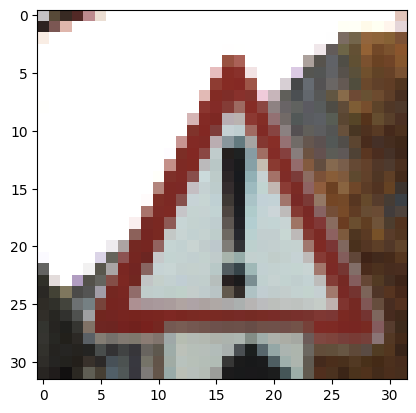

In [18]:

saved_model = tf.keras.models.load_model("traffic_signs_detection.h5")
# put the index of traffic signs pictures here
index = 6
# result
result = saved_model.predict(testX[index:(index + 1)])

plt.imshow(test["features"][index])
import numpy as np
final = np.argmax(result)
final = classNames[final]
final